<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [67]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [5]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

In [6]:
# Showing dataframe dimensions
listings_df.shape

(43566, 75)

In [7]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [11]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
39412,825454992973973734,https://www.airbnb.com/rooms/825454992973973734,20230605012709,2023-06-06,previous scrape,Rental unit in The Bronx · ★4.38 · 1 bedroom ·...,"Newly renovated, sunny, private room located o...","This space is located one exit from Manhattan,...",https://a0.muscache.com/pictures/miso/Hosting-...,23510890,https://www.airbnb.com/users/show/23510890,Lin,2014-11-09,"New York, United States",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/10a7b...,https://a0.muscache.com/im/pictures/user/10a7b...,Mott Haven,8.0,11.0,"['email', 'phone']",t,t,"The Bronx, New York, United States",Port Morris,Bronx,40.809878,-73.930404,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,1.0,"[""Dedicated workspace"", ""Mosquito net"", ""Lock ...",$67.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2023-06-06,8,8,0,2023-03-05,2023-05-01,4.38,4.75,4.25,4.88,4.75,4.25,4.50,NaN,t,6,3,3,0,2.55
17298,36076577,https://www.airbnb.com/rooms/36076577,20230605012709,2023-06-05,previous scrape,Rental unit in New York · ★4.55 · 1 bedroom · ...,Luxury / Contemporary Private One Bedroom in t...,NaN,https://a0.muscache.com/pictures/e1e37bac-8f67...,271391063,https://www.airbnb.com/users/show/271391063,Bryan,2019-06-25,"New York, NY",Currently traveling for work (More than expect...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/47b9e...,https://a0.muscache.com/im/pictures/user/47b9e...,Upper East Side,1.0,1.0,"['email', 'phone']",t,t,NaN,Upper East Side,Manhattan,40.768840,-73.957200,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""First aid kit"", ""Air conditioning"", ""Hangers...",$199.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,f,0,0,0,0,2023-06-05,11,0,0,2019-06-30,2019-12-23,4.55,4.45,4.82,4.91,4.64,5.00,4.55,NaN,f,1,1,0,0,0.23
43291,897458869903145577,https://www.airbnb.com/rooms/897458869903145577,20230605012709,2023-06-05,city scrape,Hotel in New York · ★New · 1 bedroom · 1 bed ·...,Amid the hustle and bustle of Midtown Manhatta...,Times Square - 0.2 miles; <br />Bryant Park - ...,https://a0.muscache.com/pictures/prohost-api/H...,496944100,https://www.airbnb.com/users/show/496944100,RoomPicks,2023-01-19,NaN,NaN,within an hour,98%,99%,f,https://a0.muscache.com/im/pictures/user/5ba88...,https://a0.muscache.com/im/pictures/user/5ba88...,Downtown Las Vegas,2111.0,2434.0,"['email', 'phone']",t,t,"New York, United States",Midtown,Manhattan,40.757040,-73.981110,Room in hotel,Private room,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""TV with standard cabl...",$569.00,1,365,1.0,3.0,1.0,28.0,1.0,27.9,NaN,t,12,12,12,16,2023-06-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## 2. Univariate analysis

Analysis univariate for price

In [21]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [23]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["price_float"].nunique()

1240

In [58]:
# find the maximun value
listings_df["price_float"].max()

90120.0

In [61]:
# find the minimun value different to 0
listings_df["price_float"].where(listings_df["price_float"] != 0).min()

10.0

In [27]:
# Calculating the relative frecuency of room types
listings_df["price_float"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

150.0     0.026879
100.0     0.023642
200.0     0.021301
80.0      0.016458
50.0      0.016412
            ...   
1390.0    0.000023
927.0     0.000023
602.0     0.000023
1423.0    0.000023
997.0     0.000023
Name: price_float, Length: 1240, dtype: float64

In [97]:
# Provides important statistical values to keep in mind
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    43566.000000
mean       225.216109
std        818.738268
min          0.000000
5%          42.000000
25%         80.000000
50%        136.000000
75%        228.000000
95%        561.000000
max      90120.000000
Name: price_float, dtype: float64

In [34]:
mediana = listings_df["price_float"].median()
print(mediana)

136.0


In [38]:
from scipy import stats
moda = stats.mode(listings_df["price_float"])
print(moda)

ModeResult(mode=array([150.]), count=array([1171]))


<ipython-input-38-9a2204cd0423>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(listings_df["price_float"])


<span style="color: red;">What does it means the value of 0 for this attribute?</span>

<span style="color: red;">This attribute has a extreme outlier making difficult a proper visualization?</span>

In [86]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

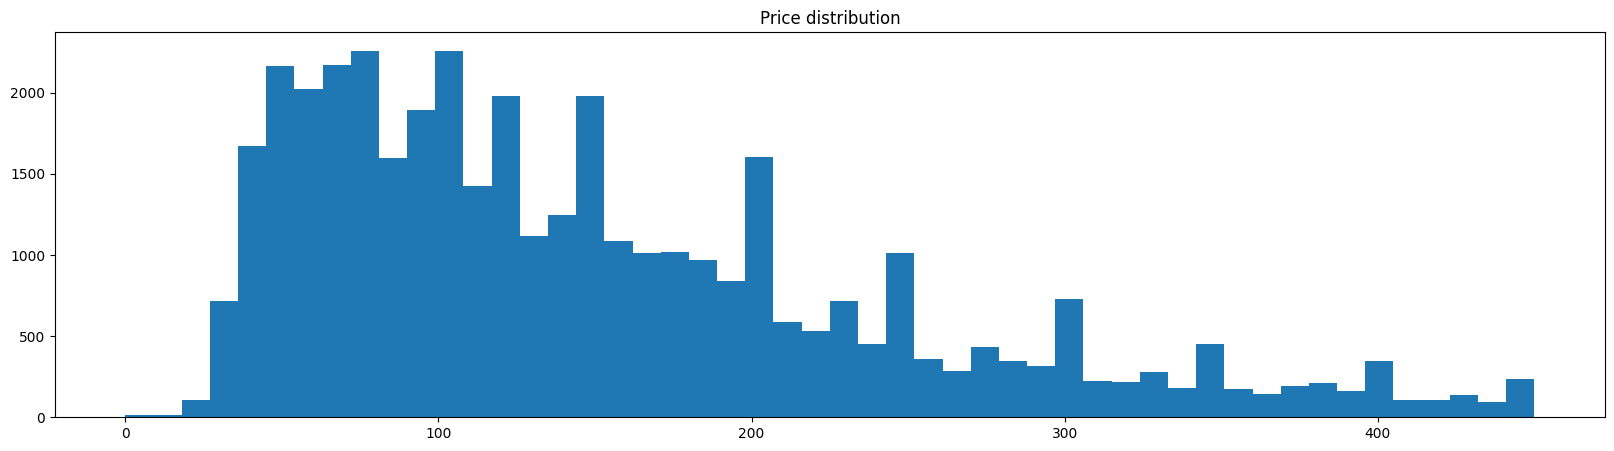

In [96]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()


Analysis univariate for Minimum_nights

In [47]:
# Showing the number of unique values of listing Minimum_nights
# This can be helpful to diagnose duplicity
listings_df["minimum_nights"].nunique()

131

In [52]:
# Showing unique values of Minimum_nights
sorted(listings_df["minimum_nights"].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 45,
 47,
 48,
 49,
 50,
 52,
 53,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 75,
 76,
 78,
 80,
 85,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 108,
 110,
 114,
 119,
 120,
 130,
 133,
 140,
 145,
 150,
 153,
 155,
 160,
 169,
 175,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 198,
 200,
 210,
 222,
 238,
 240,
 250,
 259,
 260,
 265,
 270,
 273,
 299,
 300,
 301,
 304,
 307,
 310,
 356,
 360,
 364,
 365,
 366,
 367,
 370,
 400,
 480,
 500,
 999,
 1000,
 1124,
 1250]

In [ ]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

## 2. Bivariate analysis

In [ ]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

In [ ]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()